In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

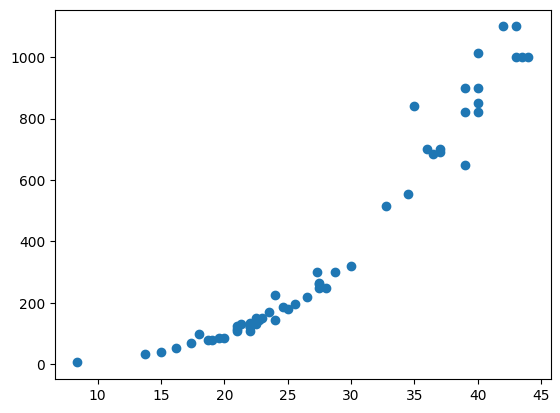

In [ ]:
# 시각화
plt.scatter(perch_length, perch_weight)

# 결정계수
$$ R^2 = 1 - \frac{{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}}{{\sum_{i=1}^{n} (y_i - \bar{y})^2}} $$


In [ ]:
# 결정 계수 - 머신러닝 모델의 적합도를 평가 0~1. 1에 가까울수록 완벽
# 설명력을 표현 : 모델로써 적합

데이터 분할 / 시각화
- train_test_splite

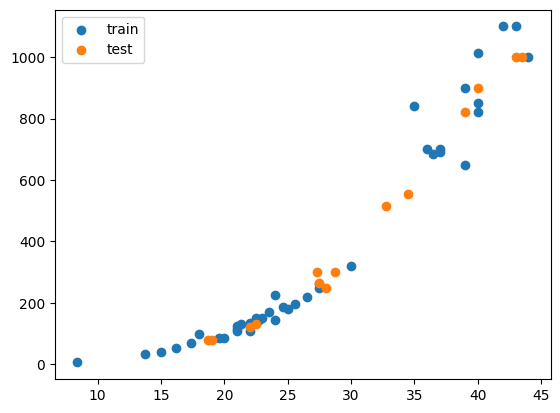

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(perch_length,perch_weight,random_state=25)
plt.scatter(X_train,y_train, label='train')
plt.scatter(X_test,y_test, label='test')
plt.legend()
plt.show()


In [ ]:
# 2차원 배열로 만들어 줘야함 : reshaped(-1,1) 둘 중 하나만 알면됨. 1차원인 것을 알고 있는 경우 뒤에
# ( ,1)을 해주고 앞은 -1로 주어 알아서 잡을 수 있게
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
X_train = X_train.reshape(-1,1); X_test = X_test.reshape(-1,1)
# reshape:크기가 바뀐 새로운 배열을 반환할 때 지정 크기가 원본 배열에 있는 원소의 개수가 다르면 에러 발
kn.fit(X_train,y_train)
kn.score(X_train,y_train), kn.score(X_test,y_test)

(0.9765554512238418, 0.9612118314189111)

# 평가
- 평균 절대값 오차
$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

In [ ]:
from sklearn.metrics import mean_absolute_error
X_test_prdict = kn.predict(X_test)
mean_absolute_error(y_test,X_test_prdict)
# 값이 높긴하지만 결정계수가 1에 가깝기 때문에 성능이 좋다는 것을 알 수 있음
# 결정계수와 꼭 함께 봐야함

44.42857142857143

In [ ]:
X_train_prdict = kn.predict(X_train)
mean_absolute_error(y_train,X_train_prdict)

31.0852380952381

# 과대 적합 VS 과소 적합
 - 이웃의 개수를 조정해 가면서 성능을 측정해보자(결정계수, MAE)
 - n = [1,3,5,7,9,10,20,42]

In [ ]:
# 학습을 하는데 패널티를 줘서 규제를 함 :  잘못된 패턴에 최적화되는 것을 막기 위함
# 과적합 해결: 규제를 둬서 제한하거나 데이터를 충분히 제공해줌

In [ ]:
# 데이터는 확보
# 모델을 만들고 학습하고 평가해서 값을 출력하는 함수를 만들고 매개변수는 이웃의 개수를 받도록 설계
# 이 함수를 for n in [1,3,5,7,8,10,20,42]:에 넣고 실행
from sklearn.neighbors import KNeighborsRegressor
'''
def modelPrint(n_neighbors):
    kn = KNeighborsRegressor(n_neighbors=n_neighbors)
    kn.fit(X_train, y_train)
    train_score = kn.score(X_train, y_train)
    test_score = kn.score(X_test, y_test)
    return train_score, test_score

for n in [1, 3, 5, 7, 8, 10, 20, 42]:
    train_score, test_score = modelPrint(n_neighbors=n)
    print(f"Neighbors: {n}, Train Score: {train_score}, Test Score: {test_score}")
'''

# Test Score가 음수가 되는 경우 : 모델이 테스트 데이터를 매우 부정확하게 예측
# 훈련데이터를 지나치게 과적합.


def kn_regression(n):
  kn = KNeighborsRegressor(n_neighbors=n)
  kn.fit(X_train,y_train)
  X_train_prdict = kn.predict(X_train); X_test_prdict = kn.predict(X_test)
  return kn.score(X_train,y_train), kn.score(X_test,y_test),mean_absolute_error(y_train,X_train_prdict),mean_absolute_error(y_test,X_test_prdict)


In [ ]:
for n in [1, 3, 5, 7, 8, 10, 20, 42]:
  print(kn_regression(n))

  # 0.1 이상 넘어가면 과적합이라고 생

(0.9728892901397944, 0.8368500285503689, 18.333333333333332, 90.85714285714286)
(0.9820393680379389, 0.9612412854329951, 25.418253968253968, 43.97619047619049)
(0.9765554512238418, 0.9612118314189111, 31.0852380952381, 44.42857142857143)
(0.9706257012222008, 0.9754229898241016, 39.10544217687076, 42.8265306122449)
(0.9696609724481403, 0.9731658159491281, 40.23988095238095, 43.263392857142854)
(0.9534419967439873, 0.9434813669775232, 47.36142857142857, 61.9)
(0.8041644352745452, 0.7317680618440002, 89.09476190476191, 125.875)
(0.0, -0.07501056078491053, 303.74013605442184, 284.6918367346939)


In [ ]:
# 거리기반은 분류 가능 값 예측 가능
# 하지만 값 예측의 경우 기준에 따라 달라 지기 때문에 적합하지 않은

In [ ]:
# 선형회귀(선형 방적식 사용)
# 가장 오차가 적은
# LinearRegression 클래스
# y = ax + b의 방정식의 해를 구한다. a 와 b는 lr.coef_, lr.intercept속성에 저장
# lr.coef_, lr.intercept는 모델 파라미터. 최적의 모델 파라미터를 찾음=모델 기반 학

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

[1196.52594953]
[36.45587339] -626.2677197463871


In [ ]:
36.45587339*50-626.2677197463871

1196.525949753613

In [ ]:
lr.predict( [[50]] ),lr.predict( [[100]] ), kn.predict( [[100]] ), kn.predict( [[50]] )

(array([1196.52594953]),
 array([3019.31961881]),
 array([1013.]),
 array([1013.]))

In [ ]:
lr.predict( [[5]] )

array([-443.98835282])

In [ ]:
# 선형 회귀 - 단항의 단점
# - 직선이기 때문에 그 자체가 단점...
# - why? 학습데이터가 직선의 형태가 아니면 오차가 크다
# - 잘못된 예측을 할 가능성이 존재(ex 음수)
# - 선형을 비선형으로 만들려면... 차수가 높아야 한다..
# - 1차 함수를 2차, 3차 ...n차 함수형태로 변경

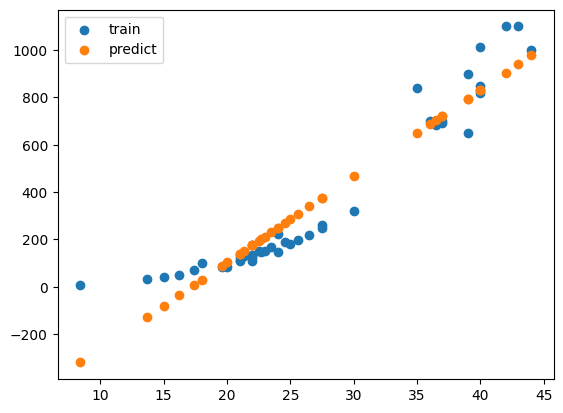

In [ ]:
# 선형 회귀 (1차 함수)
X_train_prdict = lr.predict(X_train)
plt.scatter(X_train, y_train,label='train')
plt.scatter(X_train,X_train_prdict,label='predict')
plt.legend()

In [ ]:
# 다항 회귀
X = np.column_stack( (X_train**2, X_train) )
X.shape, len(y_train)

((42, 2), 42)

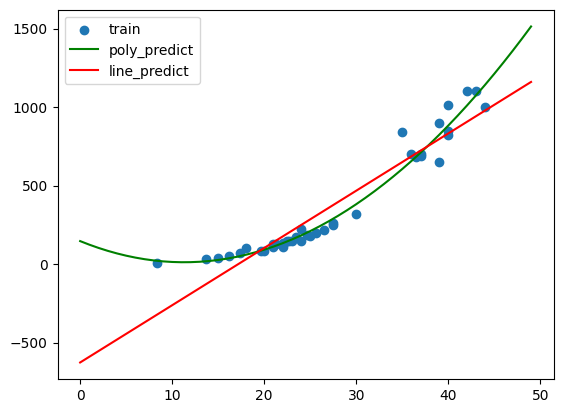

In [ ]:
plt.scatter(X_train, y_train, label='train')

# 다항 회귀
lr.fit(X, y_train)
x_p = np.column_stack((np.arange(50)**2, np.arange(50)))
X_train_predict = lr.predict(x_p)
plt.plot(range(50), X_train_predict, color='green', label='poly_predict')

# 단항 회귀
lr.fit(X_train, y_train)
temp = np.arange(50).reshape(-1, 1)
X_train_prdict = lr.predict(temp)
plt.plot(range(50), X_train_prdict, color='red', label='line_predict')

plt.legend()
plt.show()

# 비선형시 더 많은 값을 맞출 수 있음

In [ ]:
# 다항: 차수가 올라가는 것
# 다항 특성 만들기
# 데이터가 여러개면 Polynpmial Features를 이용하여 다항으로 만든다
# 1개일 경우 제곱

In [ ]:
# 특성을 여러개 사용
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
perch_full[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

In [ ]:
df.head(3)

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43


In [ ]:
# 특성 추가
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)       # 주어진 차수까지의 모든 다항식 특성을 생성하는데 사용
# poly.fit([[2,3]])     # 적용
# poly.transform([[2,3]])     # 데이터 변환
# 위의 두 줄은 한번에 해결할 수도 있음
poly.fit_transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

In [ ]:
# 실제 오차가 아닌 차수 차이
X_train,X_test,y_train,y_test = train_test_split(perch_length, perch_weight,random_state=40)
X_train = X_train.reshape(-1,1); X_test = X_test.reshape(-1,1)

# poly = PolynomialFeatures(include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly,y_train)
lr.score(X_train_poly,y_train),lr.score(X_test_poly,y_test)

# 우연의 일치로 성능이 좋게 나온 상황

(0.9816823172683758, 0.9466087450327834)

In [ ]:
# 차이가 큼 -> 과적합
# 머신 러닝은 과적합이 빈번함
# 일반화가 어려움
X_train_poly_predict = lr.predict(X_train_poly)
X_test_poly_predict = lr.predict(X_test_poly)

mean_absolute_error(y_train,X_train_poly_predict), mean_absolute_error(y_test,X_test_poly_predict)

(407.28072153151817, 353.93251401863)

In [ ]:
perch_full.shape, perch_weight.shape

((56, 3), (56,))

In [ ]:
# 1. 더 많은 특성을 사용하기 --> 성능을 높이기 위한 방법이고 선형을 비선형으로 연결
# 2. 데이터 분할(학습용, 테스트용)
# 3. 모델 선택하고 학습하기
# 4. 결정개수(score함수이용) 출력, MAE 출력
# 5. 시각화

In [ ]:
# 비선형 형태(차수는 2차원)
poly = PolynomialFeatures(degree=2)
perch_full_poly = poly.fit_transform(perch_full)
X_train, X_test, y_train, y_test = train_test_split(perch_full_poly, perch_weight)
lr = LinearRegression()
lr.fit(X_train,y_train)
print(f"학습용 결정 계수:", [lr.score(X_train,y_train)])
print(f"평가용 결정 계수:", [lr.score(X_test,y_test)])
X_train_predict = lr.predict(X_train)
X_test_predict = lr.predict(X_test)
print(f"학습용 절대값 오차:", mean_absolute_error(y_train, X_train_predict))
print(f"평가용 절대값 오차:", mean_absolute_error(y_test, X_test_predict))

학습용 결정 계수: [0.9942394618685417]
평가용 결정 계수: [0.9528873503918145]
학습용 절대값 오차: 17.872584836927942
평가용 절대값 오차: 45.12540568867285


In [ ]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
# 시각화는 x축에 해당하는 값이 현재 3개이므로 그중에 한개를 선택해서 2차원 평면에 그린다
def show_result(degree=2):  # degree는 차수 . 2차 다항식을 사용한다는
  poly = PolynomialFeatures(degree=2)
  perch_full_poly = poly.fit_transform(perch_full)
  X_train,X_test,y_train,y_test = train_test_split(perch_full_poly,perch_weight)
  lr = LinearRegression()
  lr.fit(X_train,y_train)
  print(f'학습용 결정계수 : {lr.score(X_train,y_train)}')
  print(f'평가용 결정계수 : {lr.score(X_test,y_test)}')
  X_train_predict = lr.predict(X_train)
  X_test_predict = lr.predict(X_test)
  print(f'학습용 절대값오차(MAE) : {mean_absolute_error(y_train, X_train_predict)}')
  print(f'평가용 절대값오차(MAE) : {mean_absolute_error(y_test, X_test_predict)}')
  # 시각화
  X_train_predict = lr.predict(X_train)
  sortindex = np.argsort(X_train[:,1])
  plt.scatter(X_train[:,1],y_train,label='train')
  plt.plot(X_train[:,1][sortindex],X_train_predict[sortindex],color='green', label='predict')
  plt.scatter(X_test[:,1],y_test,label='test')
  plt.legend()
  plt.show()

학습용 결정계수 : 0.9886388970870565
평가용 결정계수 : 0.9869623113521259
학습용 절대값오차(MAE) : 25.998304017556887
평가용 절대값오차(MAE) : 20.789536441522365


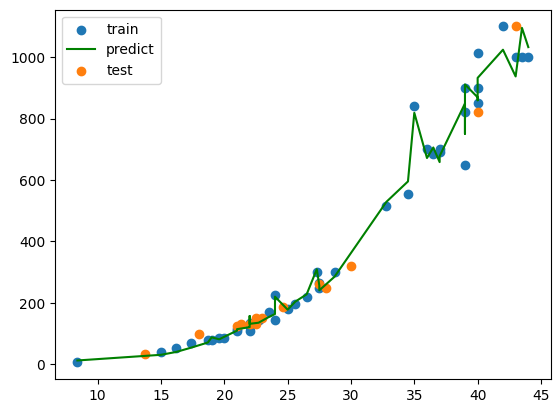

In [ ]:
show_result()

Train MAE: 0.34929380294580126
Test MAE: 0.441638300067623
Train Score: 0.9750790690678169
Test Score: 0.9623139454323149


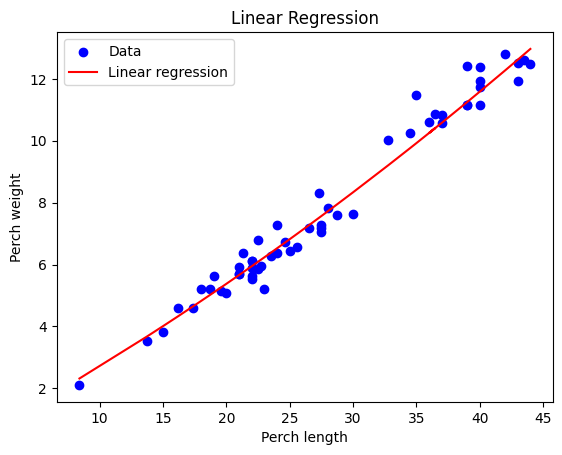

In [ ]:
############## 틀린 코드임 위에보면서 수정 #######################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 데이터 로드
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

# 다항식 특성 추가
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(perch_full[:, 0].reshape(-1, 1))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly, perch_full[:, 1], random_state=40)

# 모델 선택 및 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측 및 평가
train_mae = mean_absolute_error(y_train, lr.predict(X_train))
test_mae = mean_absolute_error(y_test, lr.predict(X_test))
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train Score:", train_score)
print("Test Score:", test_score)

# 시각화
plt.scatter(perch_full[:, 0], perch_full[:, 1], label='Data', color='blue')
plt.plot(perch_full[:, 0], lr.predict(X_poly), label='Linear regression', color='red')
plt.xlabel('Perch length')
plt.ylabel('Perch weight')
plt.title('Linear Regression')
plt.legend()
plt.show()


머신러닝
 - 인공지능
 - 딥러닝

 - 예측
  - 분류
    - class,category,범주
  - 회귀
    - 값(연속적인 값)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/auto_clean.csv')

In [ ]:
''' 컬럼에 대한 정보
| Attribute | Attribute Range
symboling: -3, -2, -1, 0, 1, 2, 3
normalized-losses: continuous from 65 to 256
make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
fuel-type: diesel, gas
aspiration: std, turbo
num-of-doors: four, two
body-style: hardtop, wagon, sedan, hatchback, convertible
drive-wheels: 4wd, fwd, rwd
engine-location: front, rear
wheel-base: continuous from 86.6 120.9
-length: continuous from 141.1 to 208.1
-width: continuous from 60.3 to 72.3
-height: continuous from 47.8 to 59.8
curb-weight: continuous from 1488 to 4066
engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor
num-of-cylinders: eight, five, four, six, three, twelve, two
engine-size: continuous from 61 to 326
fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi
bore: continuous from 2.54 to 3.94
stroke: continuous from 2.07 to 4.17
compression-ratio: continuous from 7 to 23
horsepower: continuous from 48 to 288
peak-rpm: continuous from 4150 to 6600
city-mpg: continuous from 13 to 49
highway-mpg: continuous from 16 to 54
price: continuous from 5118 to 45400.
Acknowledgements
'''

In [ ]:
data = df[['length', 'width']]
data.head(2)

,length,width
0,0.811148,0.890278
1,0.811148,0.890278


In [ ]:
# train자료 test자료 분할
# 전체 데이터 길이의 70%에 해당하는 지점을 계산
split_point = int(len(data) * 0.7)

# 전체 데이터 세트를 sample이라고
# 학습용 데이터 세트를 구성 (70%)
train_data = data[:split_point]

# 테스트용 데이터 세트를 구성 (30%)
test_data = data[split_point:]

# 결과 확인
print("Training Data Points:", len(train_data))
print("Test Data Points:", len(test_data))

Training Data Points: 140
Test Data Points: 61


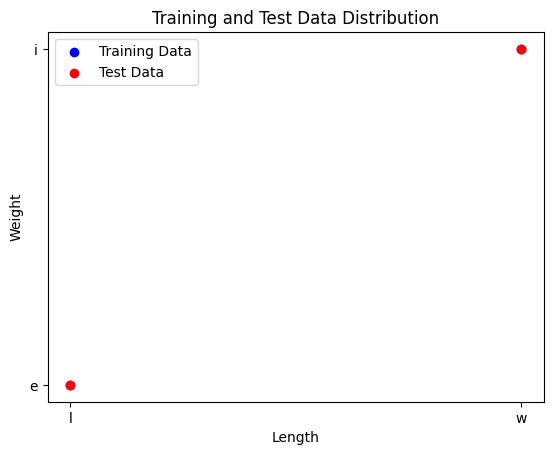

In [ ]:
# 첫번쨰 머신러닝 프로그램 이용
# 학습 데이터 시각화
plt.scatter([point[0] for point in train_data], [point[1] for point in train_data], color='blue', label='Training Data')

# 테스트 데이터 시각화
plt.scatter([point[0] for point in test_data], [point[1] for point in test_data], color='red', label='Test Data')

plt.title('Training and Test Data Distribution')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()